<a href="https://colab.research.google.com/github/smylebifa/python-basics/blob/main/Task_1(Python_training).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# функция для нахождение расстояний между точками
def distance_between_two_points(point1, point2):
  return round((((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2) ** 0.5), 3)

In [2]:
# координаты пяти точек
point_1 = (0, 2)  
point_2 = (2, 5)  
point_3 = (5, 2)  
point_4 = (6, 6) 
point_5 = (8, 3)

points = [point_1, point_2, point_3, point_4, point_5]

In [3]:
# вычисление расстояний между точками
path12 = distance_between_two_points(point_1, point_2)
path13 = distance_between_two_points(point_1, point_3)
path14 = distance_between_two_points(point_1, point_4)
path15 = distance_between_two_points(point_1, point_5)

path23 = distance_between_two_points(point_2, point_3)
path24 = distance_between_two_points(point_2, point_4)
path25 = distance_between_two_points(point_2, point_5)

path34 = distance_between_two_points(point_3, point_4)
path35 = distance_between_two_points(point_3, point_5)

path45 = distance_between_two_points(point_4, point_5)

# таблица расстояний между точками
paths = [
  [0, path12, path13, path14, path15],
	[path12, 0, path23, path24, path25],
	[path13, path23, 0, path34, path35],
	[path14, path24, path34, 0, path34],
	[path15, path25, path35, path45, 0],
]

In [4]:
# расстояния между точками
for i in range(len(paths)):
  print(paths[i])

[0, 3.606, 5.0, 7.211, 8.062]
[3.606, 0, 4.243, 4.123, 6.325]
[5.0, 4.243, 0, 4.123, 3.162]
[7.211, 4.123, 4.123, 0, 4.123]
[8.062, 6.325, 3.162, 3.606, 0]


In [5]:
# функция поиска пройденного расстояния между точками
def calcSum(curPoints):
  curPaths = []
  sumPaths = [0, 0, 0, 0, 0]
  for i in range(len(curPoints) - 1):
    curPaths.append(paths[curPoints[i]][curPoints[i+1]])
  curPaths.append(paths[curPoints[len(curPoints) - 1]][curPoints[0]])
  for x1 in range(len(curPoints)):
    for x2 in range(x1 + 1):
      sumPaths[x1] = sumPaths[x1] + curPaths[x2]         
  return sumPaths

In [6]:
# массив, где будут храниться все просчитанные маршруты
path = []

# порядковый номер текущего маршрута
counter = 0

# самый короткий путь — сразу ставим заведомо большим, 
# чтобы уменьшать его по мере работы алгоритма
minPath = 10000

# номер самого короткого маршрута
minCounter = 0

# точки текущего маршрута и расстояние, пройденное по этим точкам
curPoints = []
curPaths = []
savedPoints = []

# номер начальной точки из которой строим маршрут
i1 = 0

# перебираем все варианты перемещения по городам
for i2 in range(1, 5): 
	for i3 in range(1, 5): 
		for i4 in range(1, 5): 
			for i5 in range(1, 5): 
				# нельзя посещать один и тот же город больше одного раза
				if ((i1 != i2) and (i1 != i3) and (i1 != i4) and (i1 != i5) 
				and (i2 != i3) and (i2 != i4) and (i2 != i5) and (i3 != i4) 
				and (i3 != i5) and (i4 != i5)):

					curPoints = [i1, i2, i3, i4, i5]
					
					curPaths = calcSum(curPoints)
					
					# запоминаем текущий путь
					path.append("{} -> {}[{}] -> {}[{}] -> {}[{}] -> {}[{}] -> {}[{}]"
					.format(points[i1], points[i2], curPaths[0], points[i3], curPaths[1], 
					points[i4], curPaths[2], points[i5], curPaths[3], points[i1], curPaths[4]))							
					
					# если общее расстоения этого пути меньше минимального
					if (curPaths[4] < minPath): 								
						# то мы запоминаем это минимальное расстояние
						minPath = curPaths[4]			
							
						# запоминаем номер этого маршрута с минимальным расстоянием
						minCounter = counter

						savedPoints = curPoints
					
					# когда всё сделали, увеличиваем номер маршрута
					counter += 1

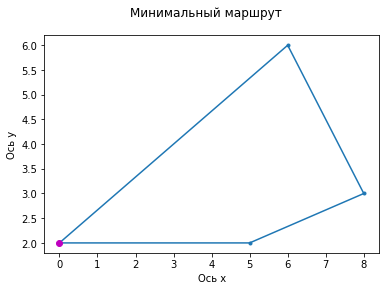

Путь с самой короткой длиной маршрута: (0, 2) -> (5, 2)[5.0] -> (8, 3)[8.161999999999999] -> (6, 6)[11.767999999999999] -> (2, 5)[15.890999999999998] -> (0, 2)[19.497] = (19.497)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 0, 0, 0, 0]
y = [0, 0, 0, 0, 0]

i = 0
for i in range(len(savedPoints)):
  (x[i],y[i]) = points[savedPoints[i]]
(x[i],y[i]) = points[savedPoints[0]]

fig, ax1 = plt.subplots(figsize=(6, 4))
fig.suptitle('Минимальный маршрут')

ax1.plot(x, y, '.-')
ax1.plot(x[0], y[0], ':om')

ax1.set_xlabel('Ось x')
ax1.set_ylabel('Ось y')

plt.show()

print(f"Путь с самой короткой длиной маршрута: {path[minCounter]} = ({minPath})")